In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
train = pd.read_csv("~/Desktop/MachineLearning/data/house-prices-data/train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [71]:
test = pd.read_csv("~/Desktop/MachineLearning/data/house-prices-data/test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


#### Have to fill NA values and do encodings on the test data too, so im combining the train and test set to do all the missing value imputation(MVI) together

In [87]:
combined = pd.concat([train, test], axis = 0)

/opt/conda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [88]:
combined.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            1567 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2874 non-null object
BsmtExposure     2875 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2877 non-null object
BsmtFinType2     2877 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2875 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      29

### Exploratory Data Analysis

In [89]:
combined.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [91]:
combined.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [92]:
categoricalColumns = []
numericalColumns = []
combined.dtypes['MSSubClass']
def getCategoricalColumns():
    for i in combined.columns:
        if str(combined.dtypes[i]) == 'object':
            categoricalColumns.append(i)
def getNumericalColumns():
    for i in combined.columns:
        if i not in categoricalColumns:
            numericalColumns.append(i)
getCategoricalColumns()
getNumericalColumns()
categoricalColumns

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [93]:
numericalColumns

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

In [94]:
dfCat = combined[categoricalColumns]
dfNum = combined[numericalColumns]

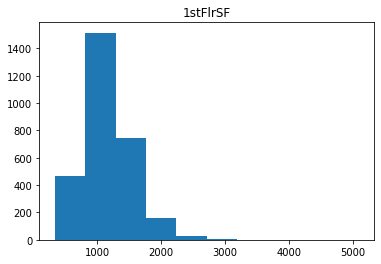

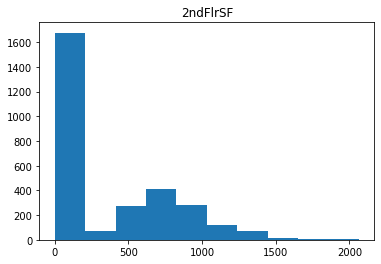

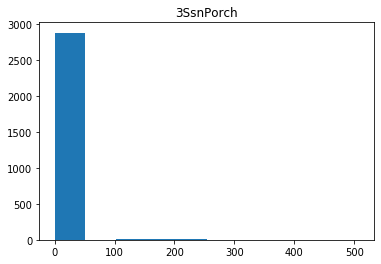

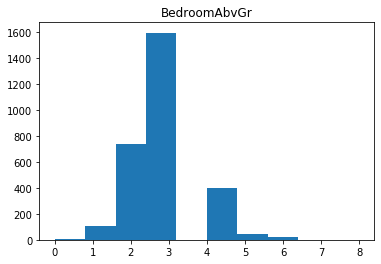

/opt/conda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


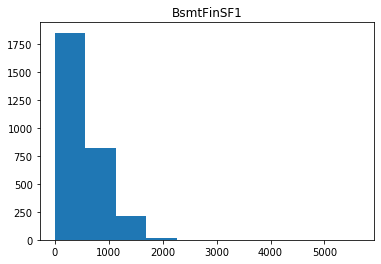

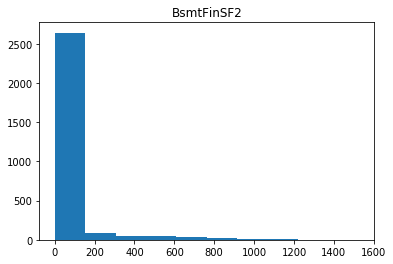

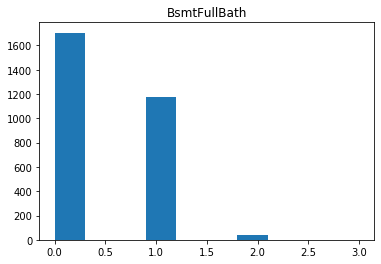

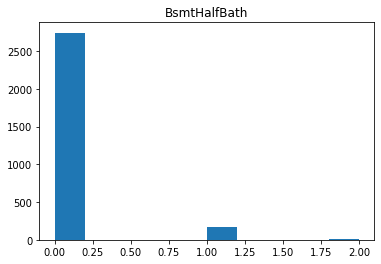

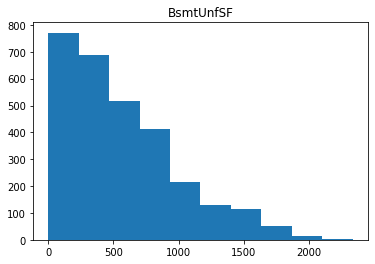

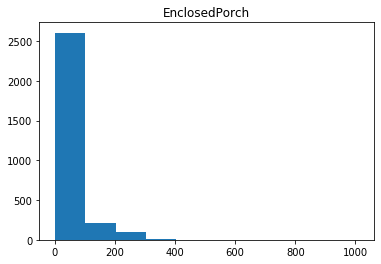

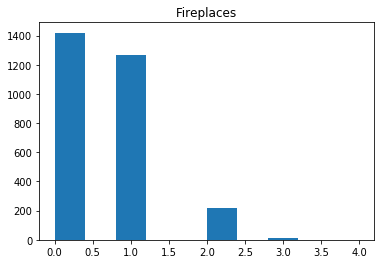

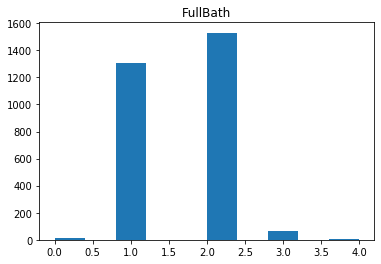

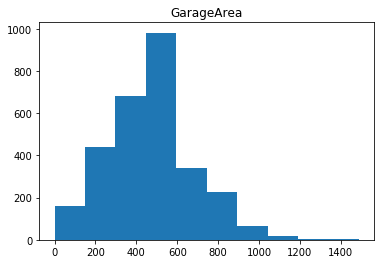

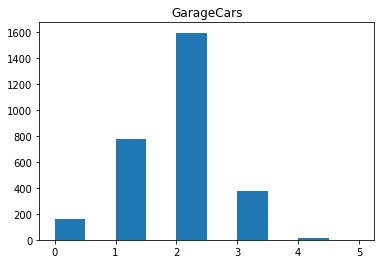

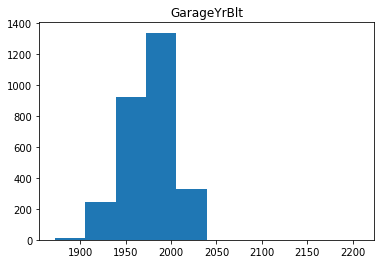

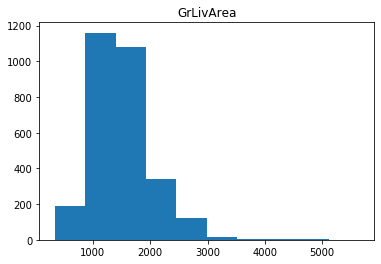

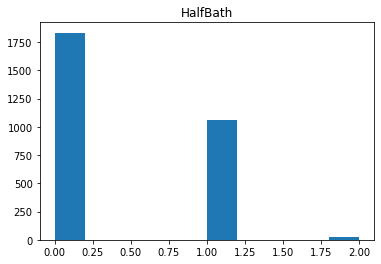

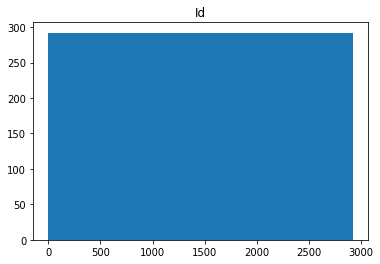

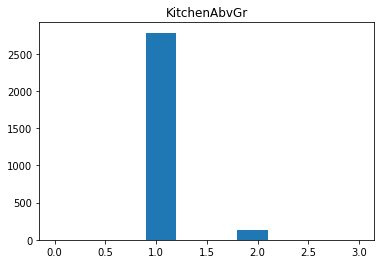

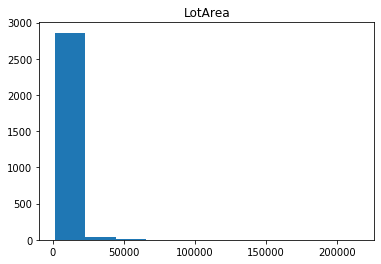

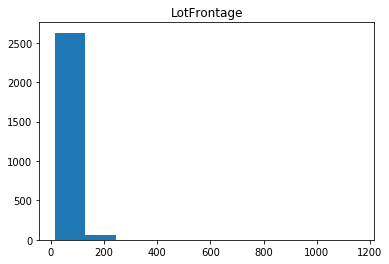

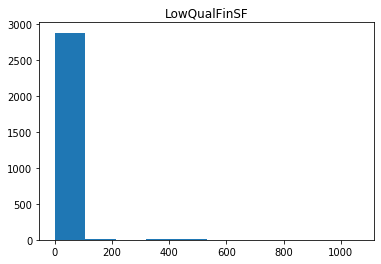

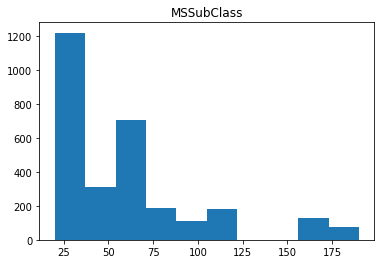

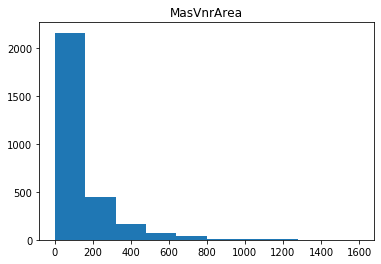

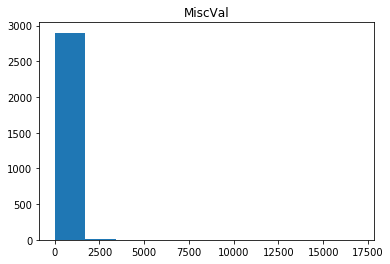

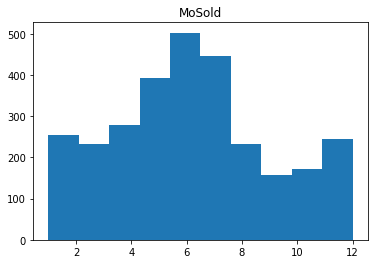

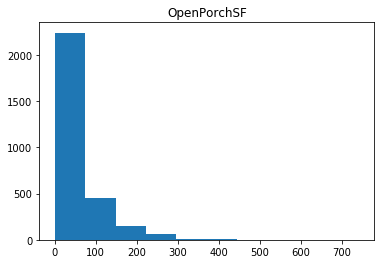

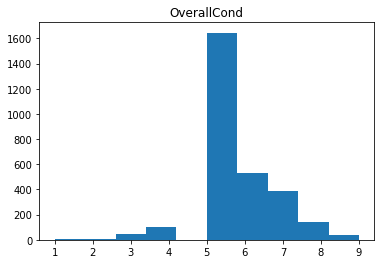

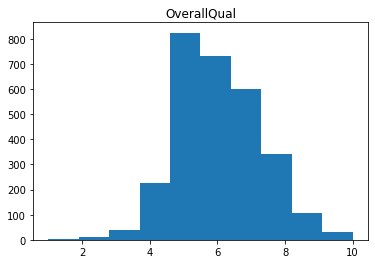

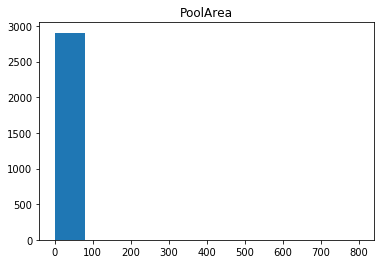

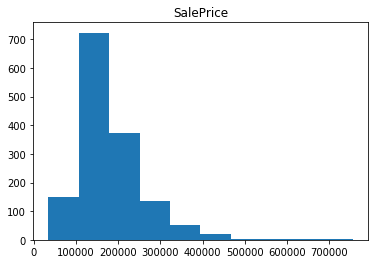

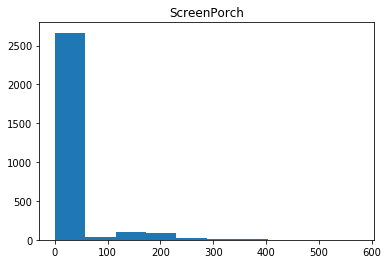

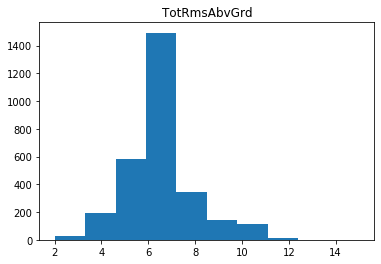

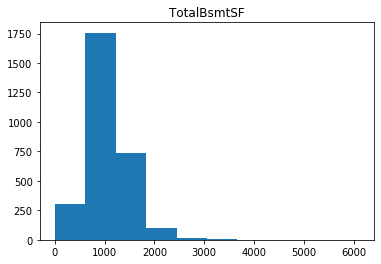

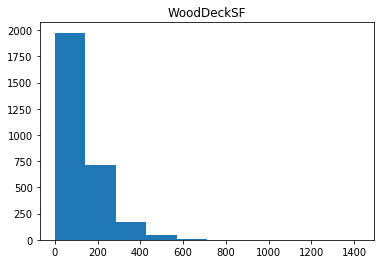

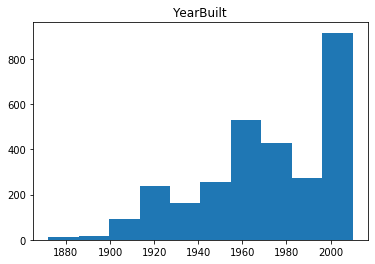

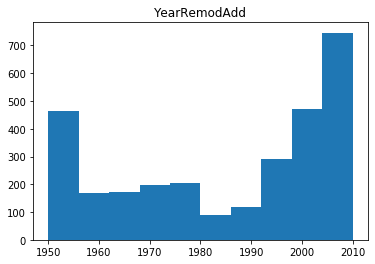

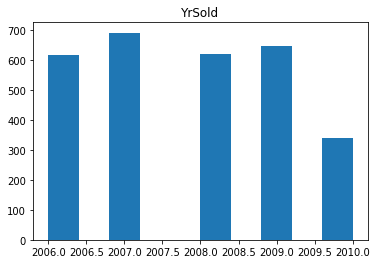

In [95]:
for i in dfNum.columns:
    plt.hist(dfNum[i])
    plt.title(i)
    plt.show()

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

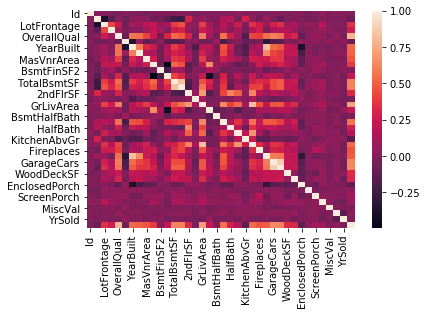

In [10]:
print(dfNum.corr())
sns.heatmap(dfNum.corr())

In [11]:
catCol = dfCat.columns 
print(dfCat.columns)
dfCat[0:30]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


### One-Hot and Label Encoding for Text Input

In [96]:
label_encoder = preprocessing.LabelEncoder()
example = pd.DataFrame(columns = ['Alley'])
#convert all columns of type object into str
combined[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']] = combined[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']].astype(str)
#label-encoding
for col in catCol:
    combined[col] = label_encoder.fit_transform(combined[col])

In [97]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null int64
BsmtCond         2919 non-null int64
BsmtExposure     2919 non-null int64
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2919 non-null int64
BsmtFinType2     2919 non-null int64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2919 non-null int64
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null int64
Condition1       2919 non-null int64
Condition2       2919 non-null int64
Electrical       2919 non-null int64
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null int64
ExterQual        2919 non-null int64
Exterior1st      2919 non-null i

In [98]:
#train.groupby('Street').count()
combined.groupby('MSZoning').count()
#Label/One-Hot Encoding
#label: MSZoning, Alley, LandContour, Utilities, LandSlope, Neighboorhood,Condition1,
#Condition2, BldgType, HouseStyle
#One-Hot: Street(Only 6 Grvl), LotShape, LotConfig, 


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
MSZoning,,,,,,,,,,,,,,,,,,,,,
0,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
1,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
2,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
3,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,...,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151
4,218,218,218,218,218,218,218,218,218,218,...,218,218,218,218,218,218,218,218,218,218
5,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
6,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
7,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
8,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,...,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114


### Picking whether to use Label or One-Hot Encoding on a Column

/opt/conda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


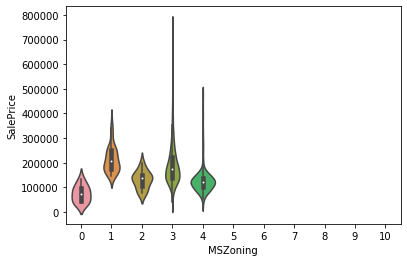

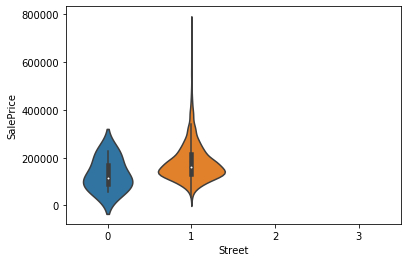

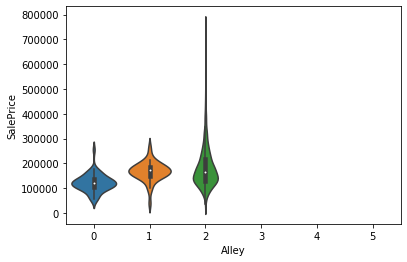

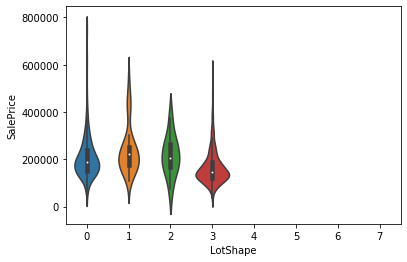

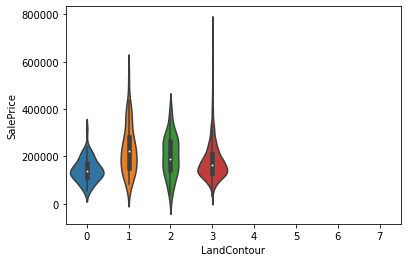

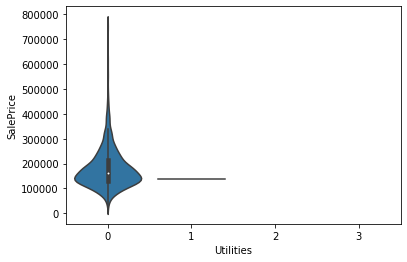

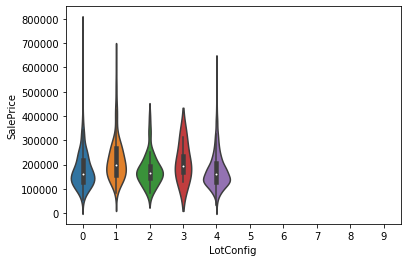

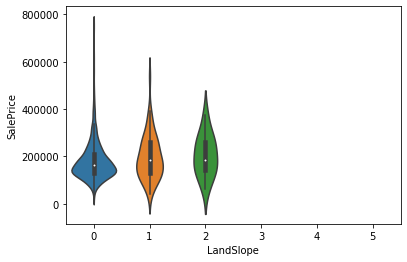

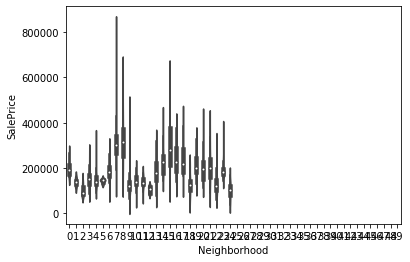

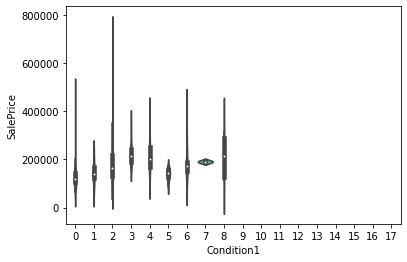

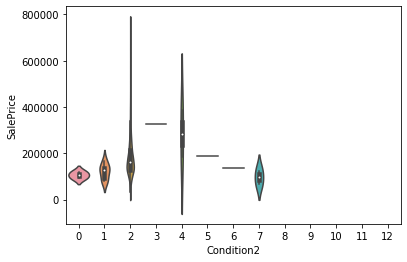

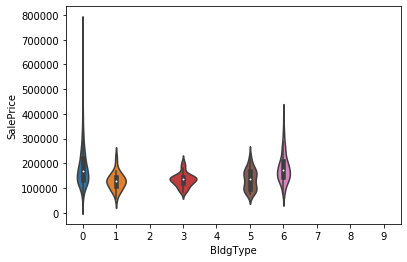

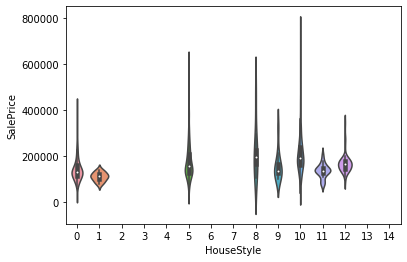

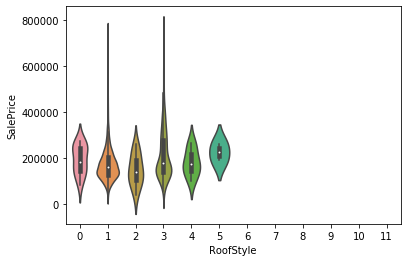

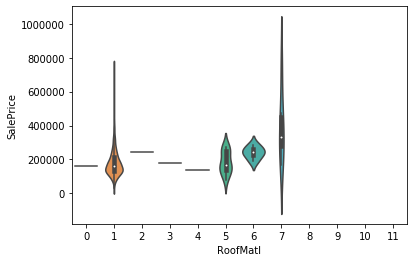

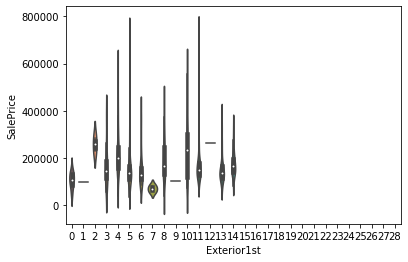

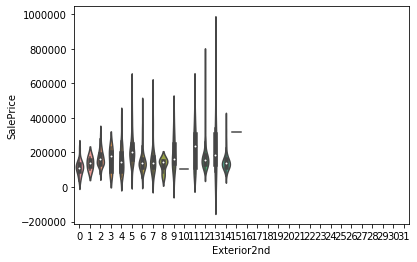

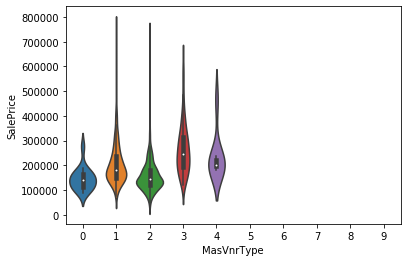

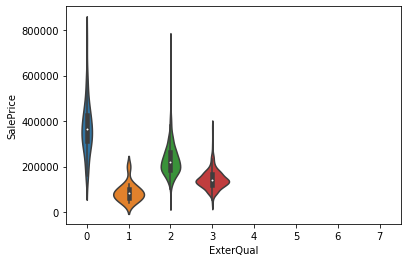

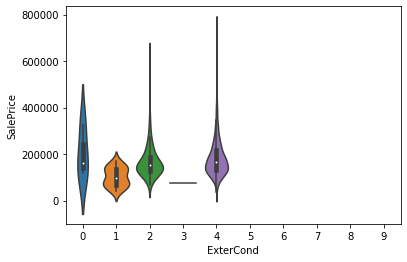

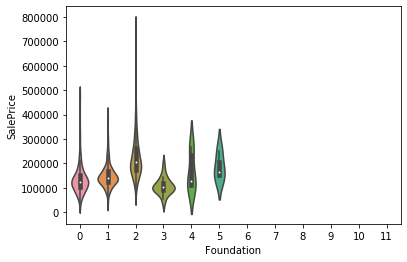

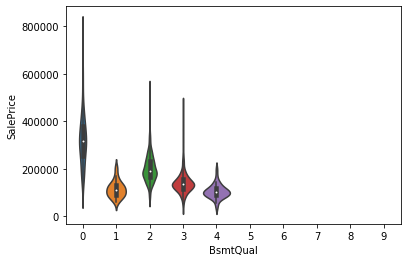

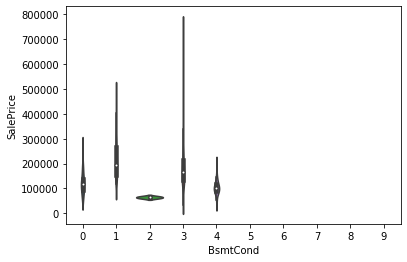

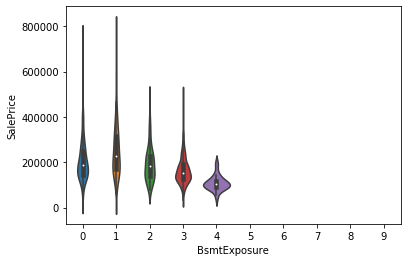

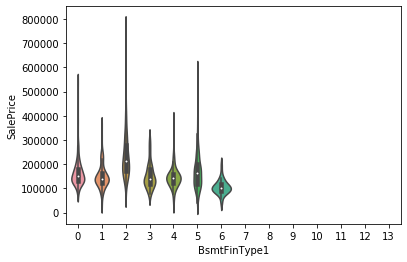

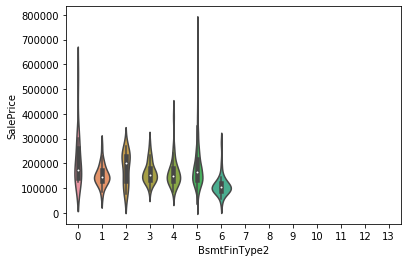

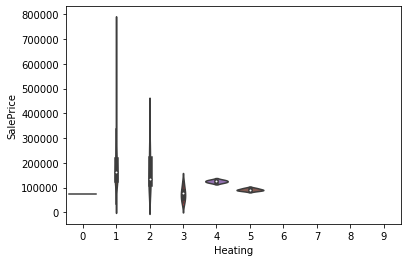

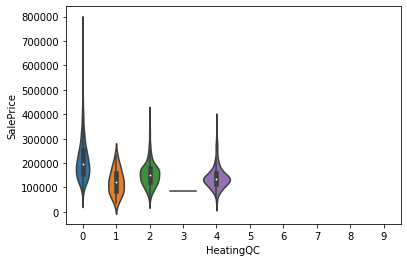

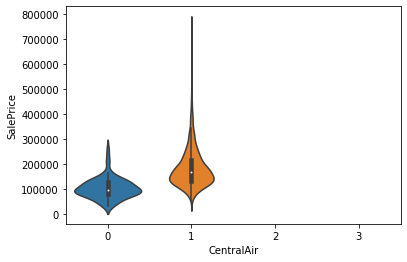

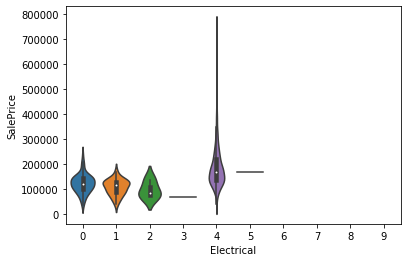

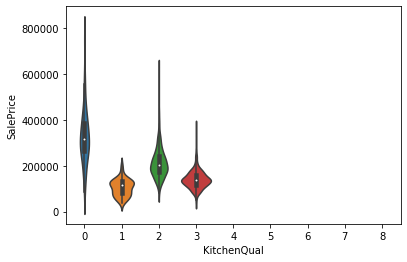

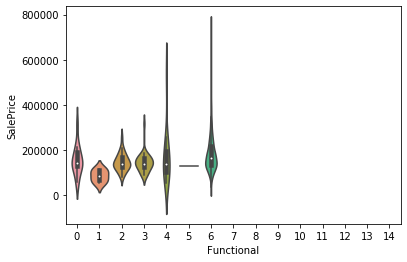

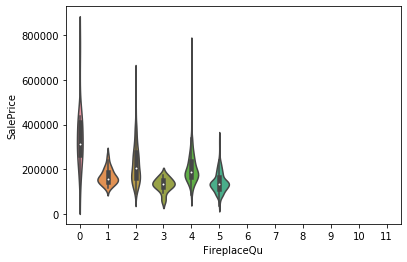

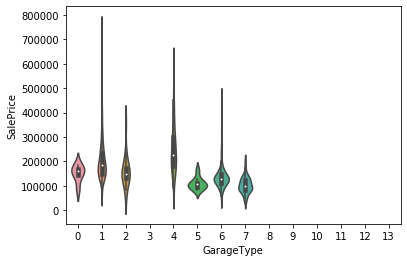

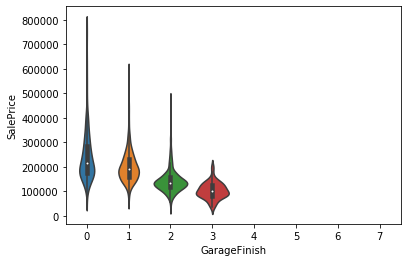

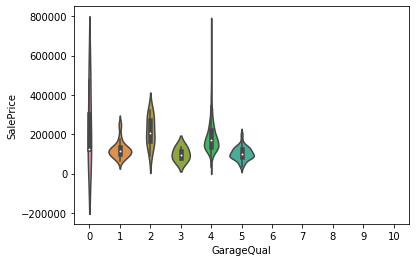

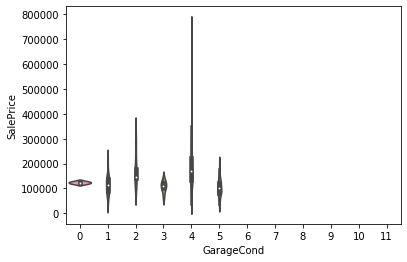

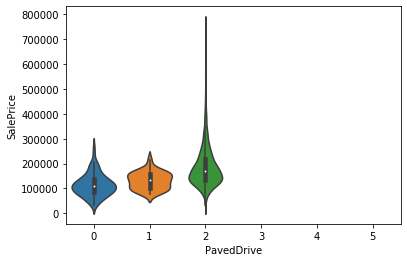

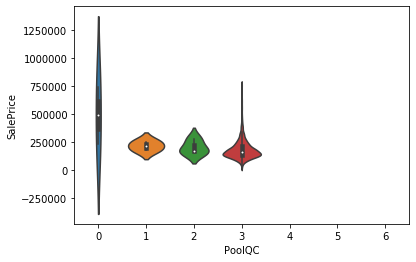

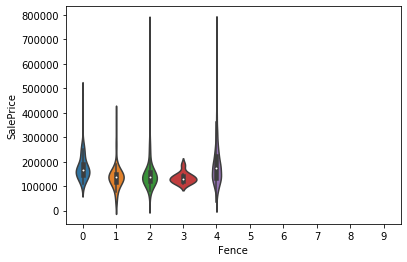

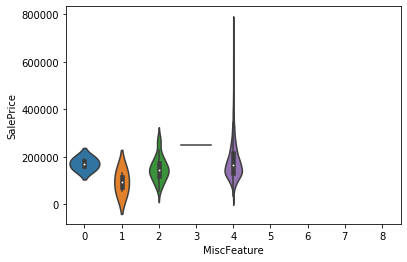

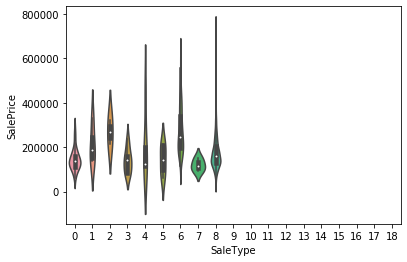

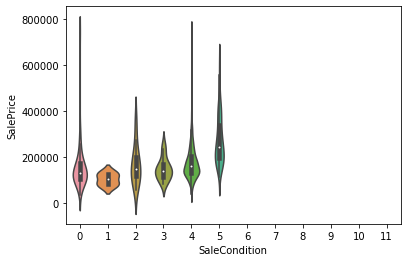

In [99]:
for col in catCol:
    plt.figure()
    sns.violinplot(combined[col],combined['SalePrice'])
    

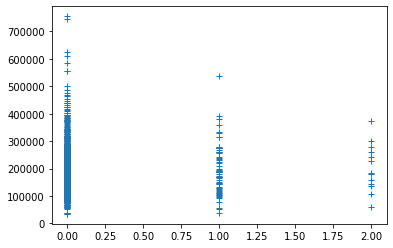

In [16]:
train.groupby("LandSlope").count()
plt.plot(train['LandSlope'],train['SalePrice'],'+')

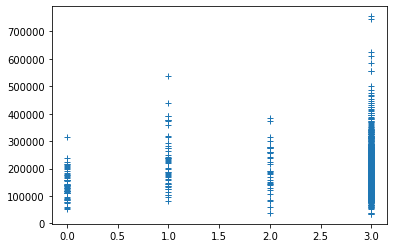

In [17]:
train.groupby("LandContour").count()
plt.plot(train['LandContour'],train['SalePrice'],'+')

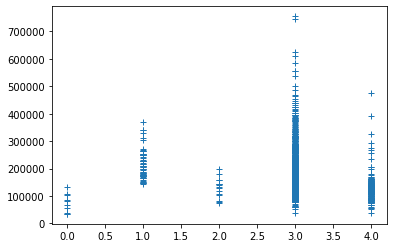

In [18]:
plt.plot(train['MSZoning'],train['SalePrice'],'+')

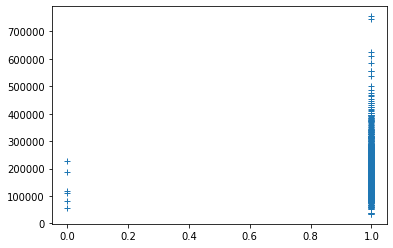

In [19]:
plt.plot(train['Street'],train['SalePrice'],'+')

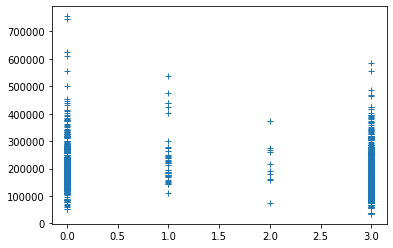

In [20]:
plt.plot(train['LotShape'],train['SalePrice'],'+')

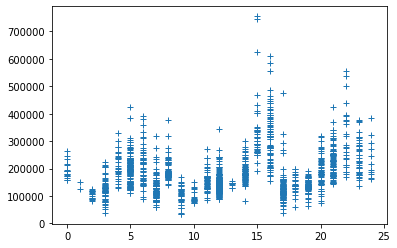

In [21]:
plt.plot(train['Neighborhood'],train['SalePrice'],'+')

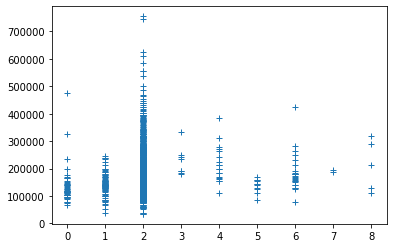

In [22]:
plt.plot(train['Condition1'],train['SalePrice'],'+')

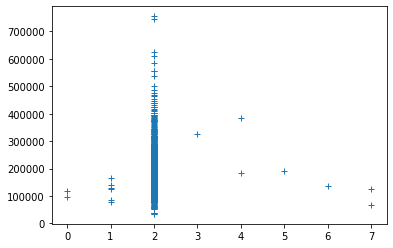

In [23]:
plt.plot(train['Condition2'],train['SalePrice'],'+')

### Outliers

In [24]:
train[train['SalePrice']>600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,3,104.0,21535,1,2,0,3,0,...,0,3,4,4,0,1,2007,8,4,755000
898,899,20,3,100.0,12919,1,2,0,3,0,...,0,3,4,4,0,3,2010,6,5,611657
1169,1170,60,3,118.0,35760,1,2,0,3,0,...,0,3,4,4,0,7,2006,8,4,625000
1182,1183,60,3,160.0,15623,1,2,0,3,0,...,555,0,2,4,0,7,2007,8,0,745000


In [25]:
train[train['LotArea']>30000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,3,68.0,50271,1,2,0,2,0,...,0,3,4,4,0,11,2006,8,4,385000
171,172,20,3,141.0,31770,1,2,0,3,0,...,0,3,4,4,0,5,2010,8,4,215000
249,250,50,3,NaN,159000,1,2,1,2,0,...,0,3,4,2,500,6,2007,8,4,277000
271,272,20,3,73.0,39104,1,2,0,2,0,...,0,3,4,4,0,4,2008,8,4,241500
313,314,20,3,150.0,215245,1,2,2,2,0,...,0,3,4,4,0,6,2009,8,4,375000
335,336,190,3,NaN,164660,0,2,0,1,0,...,0,3,4,2,700,8,2008,8,4,228950
384,385,60,3,NaN,53107,1,2,1,2,0,...,0,3,4,4,0,6,2007,8,4,240000
411,412,190,3,100.0,34650,1,2,3,0,0,...,0,3,4,4,0,1,2006,8,4,145000
451,452,20,3,62.0,70761,1,2,0,2,0,...,0,3,4,4,0,12,2006,8,4,280000
457,458,20,3,NaN,53227,1,2,0,2,0,...,0,3,4,4,0,3,2008,8,4,256000


### Filling in LotFrontage missing values
#### - Using LotArea to fill in LotFrontage values(find the average ratio between LotArea and LotFrontage)
#### - There are no missing values from LotArea

In [100]:
#LotFrontage>0 removes all the NaN values
sumLotFrontage = combined[combined['LotFrontage']>0]['LotFrontage'].sum()
sumLotArea = combined[combined['LotFrontage']>0]['LotArea'].sum()
ratioFrontageToArea = sumLotFrontage/sumLotArea
#multiply area by ratio to get Frontage
combined['LotFrontage'].fillna(combined['LotArea']*ratioFrontageToArea, inplace = True)

### Need to fill MasVnrArea and GarageYrBlt missing values
#### -They have less than 1460 in train.info()

In [101]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null int64
BsmtCond         2919 non-null int64
BsmtExposure     2919 non-null int64
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2919 non-null int64
BsmtFinType2     2919 non-null int64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2919 non-null int64
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null int64
Condition1       2919 non-null int64
Condition2       2919 non-null int64
Electrical       2919 non-null int64
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null int64
ExterQual        2919 non-null int64
Exterior1st      2919 non-null i

### Filling MasVnrArea (Masonry veneer area in square feet)

In [102]:
combined['MasVnrArea'].describe()

count    2904.000000
mean      101.919766
std       179.167105
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

#### Reference the histogram plots above
Using median instead of mean because there are some strong outliers

In [103]:
combined['MasVnrArea'].fillna(combined['MasVnrArea'].median(), inplace = True)

#### Replace missing garage year built values with year built values
Going to test accuracy with GarageYrBlt with and without

In [104]:
combined['GarageYrBlt'].fillna(combined['YearBuilt'], inplace = True)

In [110]:
combined['BsmtHalfBath'][combined['BsmtHalfBath'].isna()]

660   NaN
728   NaN
Name: BsmtHalfBath, dtype: float64

#### Need to fill null values that came from the test set

In [112]:
combined['BsmtFinSF1'].fillna(combined['BsmtFinSF1'].mean(), inplace = True)
combined['BsmtFinSF2'].fillna(combined['BsmtFinSF2'].mean(), inplace = True)
combined['BsmtFullBath'].fillna(combined['BsmtFullBath'].mean(), inplace = True)
combined['BsmtHalfBath'].fillna(combined['BsmtHalfBath'].mean(), inplace = True)
combined['BsmtUnfSF'].fillna(combined['BsmtUnfSF'].mean(), inplace = True)
combined['GarageArea'].fillna(combined['GarageArea'].mean(), inplace = True)
combined['GarageCars'].fillna(combined['GarageCars'].mean(), inplace = True)
combined['TotalBsmtSF'].fillna(combined['TotalBsmtSF'].mean(), inplace = True)

In [113]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null int64
BsmtCond         2919 non-null int64
BsmtExposure     2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null int64
BsmtFinType2     2919 non-null int64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null int64
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null int64
Condition1       2919 non-null int64
Condition2       2919 non-null int64
Electrical       2919 non-null int64
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null int64
ExterQual        2919 non-null int64
Exterior1st      2919 non-null i

y is takes the rows of combined that have a value for SalePrice

X takes rows of combined that have value for SalePrice and then removes the SalePrice column

X_test takes rows where combined does not have a value for SalePrice and then removes SalePrice column

In [154]:
y = combined['SalePrice'][pd.notnull(combined['SalePrice'])]
X = combined[pd.notnull(combined['SalePrice'])]
X = X[X.columns.difference(['SalePrice'])]
X_test = combined[pd.isnull(combined['SalePrice'])]
X_test = X_test[X_test.columns.difference(['SalePrice'])]

#y = train['SalePrice']
#X = train.loc[:, train.columns != 'SalePrice']
#X = train[train.columns.difference(['SalePrice', 'GarageYrBlt'])] - Worse Accuracy

In [146]:
X.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [147]:
X

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,2,3,0,3,3,706.0,0.0,...,8,0,1,8,856.0,0,0,2003,2003,2008
1,1262,0,0,2,3,0,3,1,978.0,0.0,...,8,0,1,6,1262.0,0,298,1976,1976,2007
2,920,866,0,2,3,0,3,2,486.0,0.0,...,8,0,1,6,920.0,0,0,2001,2002,2008
3,961,756,0,2,3,0,1,3,216.0,0.0,...,8,0,1,7,756.0,0,0,1915,1970,2006
4,1145,1053,0,2,4,0,3,0,655.0,0.0,...,8,0,1,9,1145.0,0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,2,3,0,3,3,0.0,0.0,...,8,0,1,7,953.0,0,0,1999,2000,2007
1456,2073,0,0,2,3,0,3,3,790.0,163.0,...,8,0,1,7,1542.0,0,349,1978,1988,2010
1457,1188,1152,0,2,4,0,1,3,275.0,0.0,...,8,0,1,9,1152.0,0,0,1941,2006,2010
1458,1078,0,0,2,2,0,3,2,49.0,1029.0,...,8,0,1,5,1078.0,0,366,1950,1996,2010


In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
'''
regressorLR = LinearRegression()
y_predLR = regressorLR.fit(X, y)
regressorRF = RandomForestRegressor(max_depth=2, random_state=0)
y_predRF = regressorRF.fit(X,y)
regressorSVR = SVR(kernel = 'rbf', epsilon = 0.0001) #SVR keeps giving same output
y_predSVR = regressorSVR.fit(X, y)

/Users/samuelchu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/samuelchu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [168]:
solution = y_predRF.predict(X_test)
solution

array([132550.80217887, 138391.00695094, 160658.2345087 , ...,
       132550.80217887, 132550.80217887, 197657.15292358])

In [176]:
samplesubmission = pd.read_csv("~/Desktop/MachineLearning/data/house-prices-data/sample_submission.csv")
output = pd.DataFrame({'Id':samplesubmission['Id'], 'SalePrice':solution})
output.to_csv('submission.csv', index=False)

In [151]:
'''
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
'''

TypeError: Expected sequence or array-like, got estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

With GarageYrBlt:

Mean Absolute Error: 24666.383276875742

Mean Squared Error: 2972285062.350046

Root Mean Squared Error: 54518.667099903

Without GarageYrBlt:

Mean Absolute Error: 24717.826757171086

Mean Squared Error: 2988764915.710895

Root Mean Squared Error: 54669.59772772153

In [66]:
test = pd.read_csv("~/Desktop/MachineLearning/data/house-prices-data/test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [70]:
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').